# **Import Library**

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

import tensorflow as tf
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import joblib

# **Loading Data**

Source: [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data)

In [3]:
od.download('https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: semidust
Your Kaggle Key: ··········


100%|██████████| 67.4k/67.4k [00:00<00:00, 780kB/s]

In [4]:
df = pd.read_csv('/content/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **Preprocessing Data**

## Cleaning Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


First, we remove the `id` column because it's a unique identifier and doesn't affect the stroke prediction.

In [6]:
df = df.drop(columns='id')

In [7]:
print('Missing Values:'.upper())
print(df.isna().sum())

print('____________________')
print('\nDuplicates:'.upper())
print(f'There is {df.duplicated().sum()} duplicates')

MISSING VALUES:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
____________________

DUPLICATES:
There is 0 duplicates


The `bmi` column has 201 missing values, so we can drop samples that contain missing values since it is only about 4% of the dataset.

In [8]:
df = df.dropna()

In [9]:
df.bmi.isna().sum()

0

In [10]:
df['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

There is 1 sample with *'Other'* value in `gender` column, for better result we drop them.

In [11]:
df = df[df['gender'] != 'Other']

df['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

The columns `gender`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`, `stroke`, which are categorical, will be converted from integer to category type. Meanwhile, the `age` column in float format will be converted to integer.

In [12]:
col = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

for columns in col:
  df[columns] = df[columns].astype('category')

df['age'] = df['age'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             4908 non-null   category
 1   age                4908 non-null   int64   
 2   hypertension       4908 non-null   category
 3   heart_disease      4908 non-null   category
 4   ever_married       4908 non-null   category
 5   work_type          4908 non-null   category
 6   Residence_type     4908 non-null   category
 7   avg_glucose_level  4908 non-null   float64 
 8   bmi                4908 non-null   float64 
 9   smoking_status     4908 non-null   category
 10  stroke             4908 non-null   category
dtypes: category(8), float64(2), int64(1)
memory usage: 192.9 KB


## Visualization

In [13]:
stroke_bygender = pd.crosstab(index=df['gender'], columns=df['stroke'])
stroke_byhypertension = pd.crosstab(index=df['hypertension'], columns=df['stroke'])
stroke_byheartdisease= pd.crosstab(index=df['heart_disease'], columns=df['stroke'])
stroke_bymarried= pd.crosstab(index=df['ever_married'], columns=df['stroke'])
stroke_bywork= pd.crosstab(index=df['work_type'], columns=df['stroke'])
stroke_byresidence= pd.crosstab(index=df['Residence_type'], columns=df['stroke'])
stroke_bysmoking= pd.crosstab(index=df['smoking_status'], columns=df['stroke'])

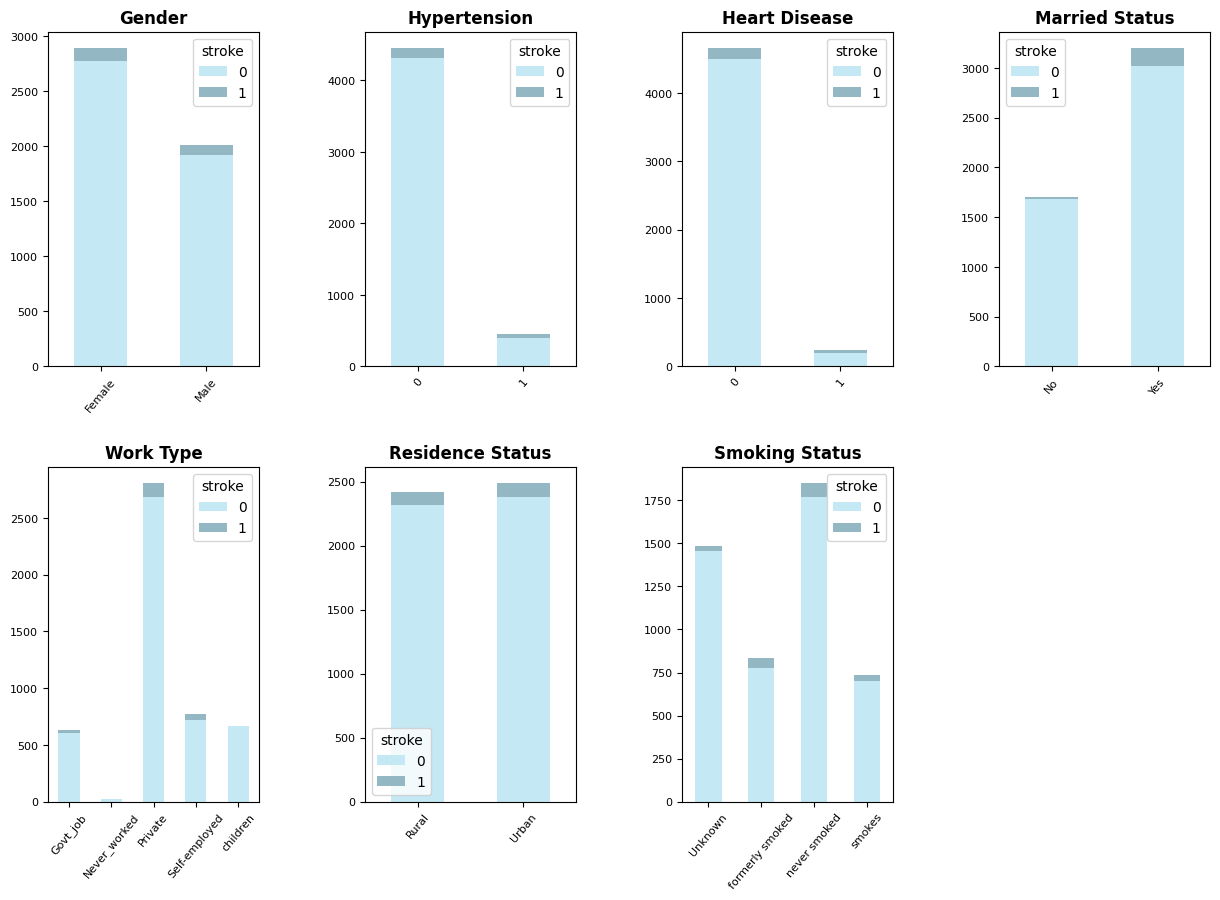

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
colors = ["#C4E9F5", "#93B8C4"]

stroke_bygender.plot(
    kind='bar',
    stacked=True,
    color=colors,
    ax=ax[0][0]
)
ax[0][0].set_title('Gender', fontsize=12, fontweight='bold')

stroke_byhypertension.plot(
    kind='bar',
    stacked=True,
    color=colors,
    ax=ax[0][1]
)
ax[0][1].set_title('Hypertension', fontsize=12, fontweight='bold')


stroke_byheartdisease.plot(
    kind='bar',
    stacked=True,
    color=colors,
    ax=ax[0][2]
)
ax[0][2].set_title('Heart Disease', fontsize=12, fontweight='bold')

stroke_bymarried.plot(
    kind='bar',
    stacked=True,
    color=colors,
    ax=ax[0][3]
)
ax[0][3].set_title('Married Status', fontsize=12, fontweight='bold')

stroke_bywork.plot(
    kind='bar',
    stacked=True,
    color=colors,
    ax=ax[1][0]
)
ax[1][0].set_title('Work Type', fontsize=12, fontweight='bold')

stroke_byresidence.plot(
    kind='bar',
    stacked=True,
    color=colors,
    ax=ax[1][1]
)
ax[1][1].set_title('Residence Status', fontsize=12, fontweight='bold')

stroke_bysmoking.plot(
    kind='bar',
    stacked=True,
    color=colors,
    ax=ax[1][2]
)
ax[1][2].set_title('Smoking Status', fontsize=12, fontweight='bold')

for i in range(2):
  for j in range(4):
    ax[i][j].tick_params(axis='x', rotation=50, labelsize=8)
    ax[i][j].tick_params(axis='y', labelsize=8)
    ax[i][j].set_xlabel(None)
    ax[i][j].set_ylabel(None)

plt.delaxes(ax[1][3])
plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()

## Data Validation

We ensure that columns with categorical types are represented in integer form.

In [15]:
# gender
df['gender'] = df['gender'].map({
    'Female': 0,
    'Male': 1
})

# ever_married
df['ever_married'] = df['ever_married'].map({
    'No': 0,
    'Yes': 1
})

# work_type
df['work_type'] = df['work_type'].map({
    'Govt_job': 0,
    'Never_worked': 1,
    'Private': 2,
    'Self-employed': 3,
    'children': 4
})

# Residence_type
df['Residence_type'] = df['Residence_type'].map({
    'Rural': 0,
    'Urban': 1
})

# smoking_status
df['smoking_status'] = df['smoking_status'].map({
    'Unknown': 0,
    'formerly smoked': 1,
    'never smoked': 2,
    'smokes': 3
})

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.6,1,1
2,1,80,0,1,1,2,0,105.92,32.5,2,1
3,0,49,0,0,1,2,1,171.23,34.4,3,1
4,0,79,1,0,1,3,0,174.12,24.0,2,1
5,1,81,0,0,1,2,1,186.21,29.0,1,1


Splitting the data into **features (X)** and **label (y).**

In [16]:
X = df.iloc[:, :10]
y = df['stroke']

Splitting the data into **data training** and **data testing** with 80% for training and 20% for testing.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Training**

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **Model Evaluation**

In [19]:
y_pred = model.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_pred, y_test))

Accuracy Score:  0.9460285132382892


Next, we will test the model using new input data to see the prediction results.

In [21]:
input_data = (1, 67, 0, 1, 1, 2, 1, 259, 39, 3)

input_data_array = np.array(input_data)
input_reshape = input_data_array.reshape(1,-1)

prediction = model.predict(input_reshape)

if(prediction[0] == 1):
  print('The patient is at a high risk of having a stroke.')
else :
  print('The patient is at a low risk of having a stroke.')

The patient is at a high risk of having a stroke.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Save Model**

In [23]:
filename = 'trained_model.sav'
joblib.dump(model, filename)

['trained_model.sav']